In [4]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF

import cufflinks as cf
cf.set_config_file(offline=True)
from plotly import tools
import json
import numpy as np
import random

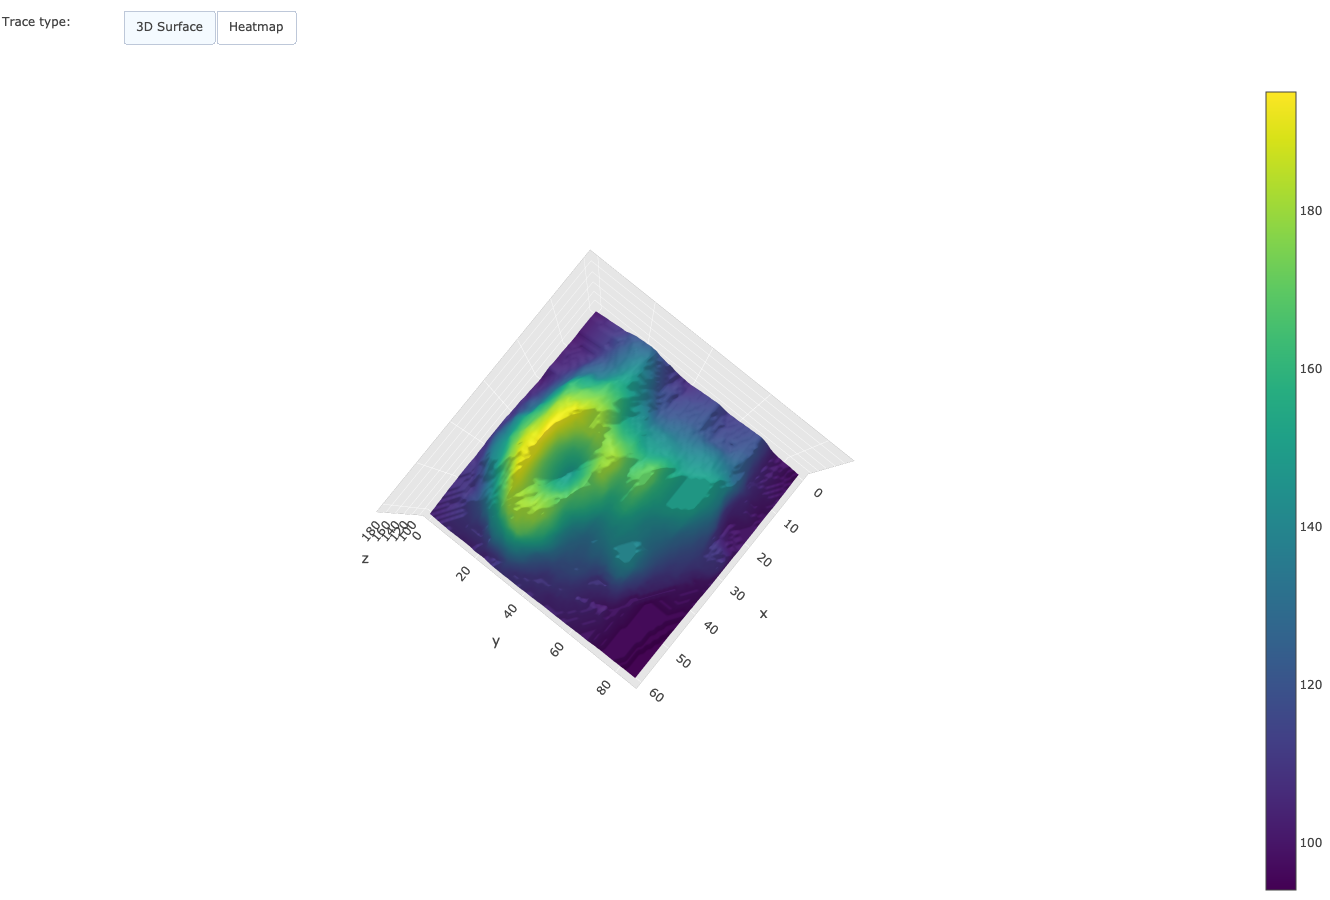

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv')

data = [go.Surface(z=df.values.tolist(), colorscale='Viridis')]

layout = go.Layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230, 230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict(x=1, y=1, z=0.7),
        aspectmode = 'manual'
    )
)

updatemenus=list([
    dict(
        buttons=list([   
            dict(
                args=['type', 'surface'],
                label='3D Surface',
                method='restyle'
            ),
            dict(
                args=['type', 'heatmap'],
                label='Heatmap',
                method='restyle'
            )             
        ]),
        direction = 'left',
        pad = {'r': 10, 't': 10},
        showactive = True,
        type = 'buttons',
        x = 0.1,
        xanchor = 'left',
        y = 1.1,
        yanchor = 'top' 
    ),
])

annotations = list([
    dict(text='Trace type:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
])
layout['updatemenus'] = updatemenus
layout['annotations'] = annotations

fig = dict(data=data, layout=layout)
iplot(fig)

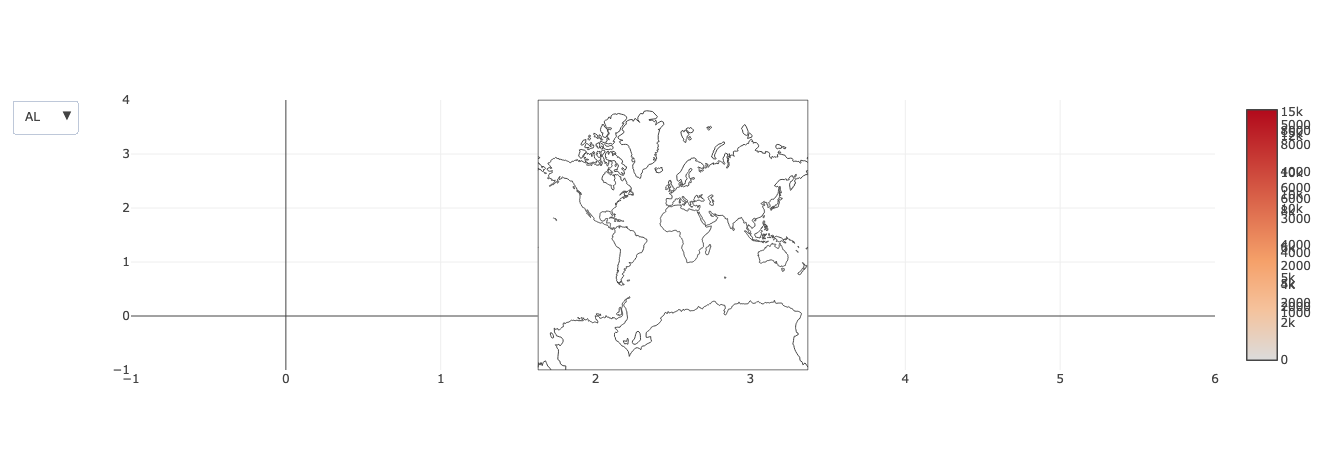

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

# create the initial map
data = [dict(type='choropleth',
             locations = df['code'].astype(str),
             z=df['total exports'].astype(float),
             locationmode='country names', 
             visible=True)]

# let's create some additional, random data
for i in range(5):
    data.append(data[0].copy())
    data[-1]['z'] = data[0]['z'] * np.random.rand(*data[0]['z'].shape)

layout = dict(geo=dict(scope='world',
                       projection={'type': 'mercator'}),
                )

# create the empty dropdown menu
updatemenus = list([dict(buttons=list()), 
                    dict(direction='down',
                         showactive=True)])

total_codes = len(df.code.unique()) + 1

for s, state in enumerate(df.code.unique()):
    # add a trace for each state
    data.append(dict(type='scatter',
                     x=[i for i in range(1984, 2016)],
                     y=[i + random.random() * 100 for i in range(1980, 2016)],
                     visible=False))

    # add each state to the dropdown    
    visible_traces = [False] * total_codes
    visible_traces[s + 1] = True
    updatemenus[0]['buttons'].append(dict(args=[{'visible': visible_traces}],
                                          label=state,
                                          method='update'))

# add a dropdown entry to reset the map    
updatemenus[0]['buttons'].append(dict(args=[{'visible': [True] + [False] *  (total_codes - 1)}],
                                      label='Map',
                                      method='update'))

# let's create the steps for the slider
# steps = []
# for i in range(len(data)):
#     step = dict(method='restyle',
#                 args=['visible', [False] * len(data)],
#                 label='Year {}'.format(i + 1984))
#     step['args'][1][i] = True
#     steps.append(step)

# sliders = [dict(active=0,
#                 pad={"t": 1},
#                 steps=steps)] 

layout['updatemenus'] = updatemenus
# layout['sliders'] = sliders

fig = dict(data=data, 
           layout=layout)

iplot(fig)